In [1]:
# This is the import cell
import sys
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.lines import Line2D
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib.ticker as ticker
first = True
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", 10)

# Here are my rc parameters for matplotlib
mpl.rc('font', serif='Helvetica Neue') 
mpl.rcParams.update({'font.size': 9})
mpl.rcParams['figure.figsize'] = 3.2, 2.8
mpl.rcParams['figure.dpi'] = 2000
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['lines.linewidth'] = 0.5
mpl.rcParams['axes.linewidth'] = 1.5

In [2]:
# Get the current path
if first:
    parent = os.getcwd()
os.chdir(parent)

# Grab file names from data folder
sm_dens = os.listdir('sm_dens')
lg_dens = os.listdir('lg_dens')
try:
    sm_dens.remove('.DS_Store')
except:
    print(".DS_Store not in directory")
try:
    lg_dens.remove('.DS_Store')
except:
    print(".DS_Store not in directory")

# Grab the MCS data
sm_pres = os.listdir('sm_pres')
lg_pres = os.listdir('lg_pres')
try:
    sm_pres.remove('.DS_Store')
except:
    print(".DS_Store not in directory")
try:
    lg_pres.remove('.DS_Store')
except:
    print(".DS_Store not in directory")

.DS_Store not in directory
.DS_Store not in directory
.DS_Store not in directory
.DS_Store not in directory


In [3]:
# Some functions to get the relevant data from the filenames
def checkFile(fname, string):
    for i in xrange(len(fname)):
        if fname[i] == string[0]:
#             print"{} matches {}".format(fname[i], string[0])
            for j in xrange(1, len(string)):
                if (i + j) > (len(fname) - 1):
                    break
                elif fname[i + j] == string[j]:
#                     print"{} matches {}".format(fname[i+j], string[j])
                    if j == (len(string) - 1):
#                         print"Final match!"
                        return True
                else:
                    break
    return False
    
def txtValue(fname, string):
    out = ""
    index = 0
    for i in xrange(len(fname)):
        if fname[i] == string[0]:
            for j in xrange(1, len(string)):
                if (i + j) > (len(fname) - 1):
                    break
                elif fname[i + j] == string[j]:
                    if j == (len(string) - 1):
                        # Last index of search string
                        index = i + j
                else:
                    break
                        
    # First index of value
    index += 1
    mybool = True
    while mybool:
        if fname[index].isdigit():
            out = out + fname[index]
            index += 1
        elif fname[index] == ".":    
            if fname[index+1].isdigit():
                out = out + fname[index]
                index += 1
            else:
                mybool = False
        else:
            mybool = False
    return float(out)

# Sorting functions
def multiSort(arr1, arr2, arr3, arr4):
    """Sort an array the slow (but certain) way, returns original indices in sorted order"""
    # Doing this for PeR, PeS, xS in this case
    cpy1 = np.copy(arr1)
    cpy2 = np.copy(arr2)
    cpy3 = np.copy(arr3)
    cpy4 = np.copy(arr4)
    ind = np.arange(0, len(arr1))
    for i in xrange(len(cpy1)):
        for j in xrange(len(cpy1)):
            # Sort by first variable
            if cpy1[i] > cpy1[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
                
            # If first variable is equal, resort to second variable
            elif cpy1[i] == cpy1[j] and cpy2[i] > cpy2[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
                
            elif cpy1[i] == cpy1[j] and cpy2[i] == cpy2[j] and cpy3[i] > cpy3[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
            elif cpy1[i] == cpy1[j] and cpy2[i] == cpy2[j] and cpy3[i] == cpy3[j] and cpy4[i] > cpy4[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
    return ind

def indSort(arr1, arr2):
    """Take sorted index array, use to sort array"""
    # arr1 is array to sort
    # arr2 is index array
    cpy = np.copy(arr1)
    for i in xrange(len(arr1)):
        arr1[i] = cpy[arr2[i]]

In [4]:
# Get small cluster density data
chkStrings = ["pe", "pa", "pb", "xa", "ep", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in sm_dens:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 
                
# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
    print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("ep")],
                       storeVals[chkStrings.index("cluster")])
    indSort(dens, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_sm_dens = []
if len(sm_dens) > 0:
    os.chdir(parent)
    os.chdir('sm_dens')
    for i in sm_dens:
        print(i)
        df = pd.read_csv(i, sep='\s+', header=0)
        all_sm_dens.append(df)
    os.chdir(parent)

    # This is how you access the data at different levels
    display(all_sm_dens[0])

In [5]:
# Get large cluster density data
chkStrings = ["pe", "pa", "pb", "xa", "ep", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in lg_dens:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 
                
# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
    print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("ep")],
                       storeVals[chkStrings.index("cluster")])
    indSort(dens, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_lg_dens = []
if len(lg_dens) > 0:
    os.chdir(parent)
    os.chdir('lg_dens')
    for i in lg_dens:
        print(i)
        df = pd.read_csv(i, sep='\s+', header=0)
        all_lg_dens.append(df)
    os.chdir(parent)

    # This is how you access the data at different levels
    display(all_lg_dens[0])

In [6]:
# Get small cluster pressure data
chkStrings = ["pe", "pa", "pb", "xa", "ep", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in sm_pres:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 

# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
    print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("ep")],
                       storeVals[chkStrings.index("cluster")])
    indSort(sm_pres, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_sm_pres = []
if len(sm_pres) > 0:
    os.chdir(parent)
    os.chdir('sm_pres')
    for i in sm_pres:
        print(i)
        df = pd.read_csv(i, sep='\s+', header=0)
        all_sm_pres.append(df)
    os.chdir(parent)

    # This is how you access the data at different levels
    display(all_sm_pres[-1])

Sorting... 
cluster_pressure_pa100.0_pb0.0_xa100.0_phi55_ep0.000.txt
cluster_pressure_pa100.0_pb0.0_xa100.0_phi55_ep0.001.txt
cluster_pressure_pa100.0_pb0.0_xa100.0_phi55_ep0.010.txt
cluster_pressure_pa100.0_pb0.0_xa100.0_phi55_ep0.100.txt
cluster_pressure_pa100.0_pb0.0_xa100.0_phi55_ep1.000.txt
cluster_pressure_pa150.0_pb0.0_xa100.0_phi55_ep0.000.txt
cluster_pressure_pa150.0_pb0.0_xa100.0_phi55_ep0.001.txt
cluster_pressure_pa150.0_pb0.0_xa100.0_phi55_ep0.010.txt
cluster_pressure_pa150.0_pb0.0_xa100.0_phi55_ep0.100.txt
cluster_pressure_pa150.0_pb0.0_xa100.0_phi55_ep1.000.txt
cluster_pressure_pa200.0_pb0.0_xa100.0_phi55_ep0.000.txt
cluster_pressure_pa200.0_pb0.0_xa100.0_phi55_ep0.001.txt
cluster_pressure_pa200.0_pb0.0_xa100.0_phi55_ep0.100.txt
cluster_pressure_pa200.0_pb0.0_xa100.0_phi55_ep1.000.txt
cluster_pressure_pa250.0_pb0.0_xa100.0_phi55_ep0.000.txt
cluster_pressure_pa250.0_pb0.0_xa100.0_phi55_ep0.001.txt
cluster_pressure_pa250.0_pb0.0_xa100.0_phi55_ep0.010.txt
cluster_pressure_pa

,Timestep,gasArea,gasTrace,gasPress,bulkArea,bulkTrace,bulkPress,SurfaceTense,Length,NDense
0,0.000,95002.465,28330.789,0.298,44699.528,1.464920e+08,3277.262,2266579.995,691.7,82326
1,0.167,96296.435,617623.266,6.414,42890.752,2.359146e+08,5500.362,4578540.782,833.4,84258
2,0.333,97243.829,630770.806,6.486,41367.839,2.838816e+08,6862.375,6607983.280,963.8,84395
3,0.500,97773.813,562505.577,5.753,40971.932,3.109270e+08,7588.781,6984750.636,921.1,84755
4,0.667,97632.147,494253.483,5.062,41018.732,3.247107e+08,7916.156,7473776.816,944.7,85481
...,...,...,...,...,...,...,...,...,...,...
596,99.333,97221.061,461357.908,4.745,41518.359,3.219341e+08,7754.017,7242462.563,934.6,86248
597,99.500,97170.466,470489.928,4.842,41510.770,3.185489e+08,7673.886,7262358.284,947.0,86057
598,99.666,97237.505,460977.277,4.741,41245.145,3.226690e+08,7823.200,7737990.732,989.7,86036
599,99.833,97319.722,487159.588,5.006,41321.038,3.232923e+08,7823.916,7377896.160,943.6,86086


In [7]:
# Get small cluster parameters
if len(all_sm_pres) > 0:
    headers = ['pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt']
    sm_params = pd.DataFrame(columns=headers)
    for i in range(0, len(all_sm_pres)):
        pe = int(storeVals[chkStrings.index("pe")][i])
        pa = int(storeVals[chkStrings.index("pa")][i])
        pb = int(storeVals[chkStrings.index("pb")][i])
        xa = float(storeVals[chkStrings.index("xa")][i])
        ep = float(storeVals[chkStrings.index("ep")][i])
        phi = float(storeVals[chkStrings.index("phi")][i])
        dtau = float(storeVals[chkStrings.index("dtau")][i])
        df = pd.DataFrame([[pe, pa, pb, xa, ep, phi, dtau]], columns=headers)
        sm_params = sm_params.append(df, ignore_index = True)
    display(sm_params)

,pe,peA,peB,xA,eps,phi,tauPer_dt
0,0,100,0,100.0,0.0001,55.0,0.000001
1,0,100,0,100.0,0.0010,55.0,0.000001
2,0,100,0,100.0,0.0100,55.0,0.000001
3,0,100,0,100.0,0.1000,55.0,0.000001
4,0,100,0,100.0,1.0000,55.0,0.000001
...,...,...,...,...,...,...,...
38,0,450,0,100.0,1.0000,55.0,0.000001
39,0,500,0,100.0,0.0010,55.0,0.000001
40,0,500,0,100.0,0.0100,55.0,0.000001
41,0,500,0,100.0,0.1000,55.0,0.000001


In [8]:
# Get large cluster pressure data
chkStrings = ["pe", "pa", "pb", "xa", "ep", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in lg_pres:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 

# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
    print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("ep")],
                       storeVals[chkStrings.index("cluster")])
    indSort(lg_pres, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_lg_pres = []
if len(lg_pres) > 0:
    os.chdir(parent)
    os.chdir('lg_pres')
    for i in lg_pres:
        print(i)
        df = pd.read_csv(i, sep='\s+', header=0)
        all_lg_pres.append(df)
    os.chdir(parent)

    # This is how you access the data at different levels
    display(all_lg_pres[-1])

Sorting... 
cluster_pressure_pa200.0_pb0.0_xa100.0_phi45_ep0.000.txt
cluster_pressure_pa200.0_pb0.0_xa100.0_phi45_ep0.001.txt
cluster_pressure_pa200.0_pb0.0_xa100.0_phi45_ep0.010.txt
cluster_pressure_pa200.0_pb0.0_xa100.0_phi45_ep0.100.txt
cluster_pressure_pa200.0_pb0.0_xa100.0_phi45_ep1.000.txt
cluster_pressure_pa200.0_pb0.0_xa100.0_phi55_ep0.000.txt
cluster_pressure_pa200.0_pb0.0_xa100.0_phi55_ep0.001.txt
cluster_pressure_pa200.0_pb0.0_xa100.0_phi55_ep0.010.txt
cluster_pressure_pa200.0_pb0.0_xa100.0_phi55_ep1.000.txt
cluster_pressure_pa200.0_pb0.0_xa100.0_phi65_ep0.000.txt
cluster_pressure_pa200.0_pb0.0_xa100.0_phi65_ep0.001.txt
cluster_pressure_pa200.0_pb0.0_xa100.0_phi65_ep0.010.txt
cluster_pressure_pa200.0_pb0.0_xa100.0_phi65_ep0.100.txt
cluster_pressure_pa200.0_pb0.0_xa100.0_phi65_ep1.000.txt


,Timestep,gasArea,gasTrace,gasPress,bulkArea,bulkTrace,bulkPress,SurfaceTense,Length,NDense
0,0.000,62096.550,12639.817,0.204,55327.420,7.273868e+07,1314.695,1002576.682,762.7,90493
1,0.167,62410.392,135598.358,2.173,54692.141,9.039456e+07,1652.789,1379637.610,835.8,91306
2,0.333,61716.901,143083.248,2.318,55024.967,8.952152e+07,1626.925,1527864.158,940.5,91263
3,0.500,62492.650,184504.898,2.952,54072.049,9.002407e+07,1664.891,1637755.982,985.4,90091
4,0.667,63393.682,229746.231,3.624,53046.999,9.169939e+07,1728.644,1783363.214,1033.8,88969
...,...,...,...,...,...,...,...,...,...,...
596,99.333,66327.098,337417.986,5.087,50308.468,9.902321e+07,1968.321,1923624.537,979.8,86051
597,99.500,66758.632,360662.963,5.402,49809.864,1.004438e+08,2016.544,1995452.027,992.2,85658
598,99.666,66905.429,368820.916,5.513,49707.359,1.011414e+08,2034.737,1990566.635,980.9,85624
599,99.833,67142.076,373211.098,5.559,49503.614,1.016335e+08,2053.052,2003881.359,978.7,85488


In [9]:
# Get large cluster parameters
if len(all_lg_pres) > 0:
    headers = ['pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt']
    lg_params = pd.DataFrame(columns=headers)
    for i in range(0, len(all_lg_pres)):
        pe = int(storeVals[chkStrings.index("pe")][i])
        pa = int(storeVals[chkStrings.index("pa")][i])
        pb = int(storeVals[chkStrings.index("pb")][i])
        xa = float(storeVals[chkStrings.index("xa")][i])
        ep = float(storeVals[chkStrings.index("ep")][i])
        phi = float(storeVals[chkStrings.index("phi")][i])
        dtau = float(storeVals[chkStrings.index("dtau")][i])
        df = pd.DataFrame([[pe, pa, pb, xa, ep, phi, dtau]], columns=headers)
        lg_params = lg_params.append(df, ignore_index = True)
    display(lg_params)

,pe,peA,peB,xA,eps,phi,tauPer_dt
0,0,200,0,100.0,0.0001,45.0,0.000001
1,0,200,0,100.0,0.0010,45.0,0.000001
2,0,200,0,100.0,0.0100,45.0,0.000001
3,0,200,0,100.0,0.1000,45.0,0.000001
4,0,200,0,100.0,1.0000,45.0,0.000001
...,...,...,...,...,...,...,...
9,0,200,0,100.0,0.0001,65.0,0.000001
10,0,200,0,100.0,0.0010,65.0,0.000001
11,0,200,0,100.0,0.0100,65.0,0.000001
12,0,200,0,100.0,0.1000,65.0,0.000001


In [10]:
# Let's add columns to the time-resolved simulation data
if len(all_sm_dens) > 0:
    print("Small cluster density:")
    for i in range(0, len(all_sm_dens)):
        # Ger rid of NaN in favor of 0
        all_sm_dens[i].fillna(0, inplace=True)

    headers=list(all_sm_dens[0])
    display(all_sm_dens[0])
    print(all_sm_dens[0][headers[1]][0])
    print(all_sm_dens[0][headers[2]][0])
    
if len(all_lg_dens) > 0:
    print("Large cluster density:")
    for i in range(0, len(all_lg_dens)):
        # Ger rid of NaN in favor of 0
        all_lg_dens[i].fillna(0, inplace=True)

    headers=list(all_lg_dens[0])
    display(all_lg_dens[0])
    print(all_lg_dens[0][headers[1]][0])
    print(all_lg_dens[0][headers[2]][0])
    
if len(all_sm_pres) > 0:
    print("Small cluster pressure:")
    for i in range(0, len(all_sm_dens)):
        # Ger rid of NaN in favor of 0
        all_sm_pres[i].fillna(0, inplace=True)

    headers=list(all_sm_pres[0])
    display(all_sm_pres[0])
    print(all_sm_pres[0][headers[1]][0])
    print(all_sm_pres[0][headers[2]][0])
    
if len(all_lg_pres) > 0:
    print("Large cluster pressure:")
    for i in range(0, len(all_lg_pres)):
        # Ger rid of NaN in favor of 0
        all_lg_pres[i].fillna(0, inplace=True)

    headers=list(all_lg_pres[0])
    display(all_lg_pres[0])
    print(all_lg_pres[0][headers[1]][0])
    print(all_lg_pres[0][headers[2]][0])

Small cluster pressure:


,Timestep,gasArea,gasTrace,gasPress,bulkArea,bulkTrace,bulkPress,SurfaceTense,Length,NDense
0,0.000,136312.119,5080.777,0.037,5369.408,6.771296e+06,1261.088,309181.430,245.2,32685
1,0.167,136529.678,320610.488,2.348,5059.512,1.106679e+07,2187.323,614342.654,281.2,33113
2,0.333,136376.628,318223.579,2.333,5175.881,1.058312e+07,2044.699,588027.811,287.9,33231
3,0.500,136079.382,318620.230,2.341,5284.661,9.773539e+06,1849.417,643977.374,348.6,33202
4,0.667,135868.147,323841.576,2.383,5309.958,9.110849e+06,1715.804,749614.437,437.5,32847
...,...,...,...,...,...,...,...,...,...,...
596,99.333,142799.679,695276.250,4.869,0.000,0.000000e+00,0.000,0.000,0.0,126
597,99.500,142799.679,699618.313,4.899,0.000,0.000000e+00,0.000,0.000,0.0,104
598,99.666,142799.679,701713.989,4.914,0.000,0.000000e+00,0.000,0.000,0.0,113
599,99.833,142799.679,703213.448,4.924,0.000,0.000000e+00,0.000,0.000,0.0,119


136312.119
5080.777
Large cluster pressure:


,Timestep,gasArea,gasTrace,gasPress,bulkArea,bulkTrace,bulkPress,SurfaceTense,Length,NDense
0,0.000,159219.356,92.381,0.001,13643.914,3.574332e+07,2619.726,1015011.246,387.4,90391
1,0.167,160095.906,8738.567,0.055,12701.780,5.790053e+07,4558.458,1786628.239,391.9,90274
2,0.333,159789.429,13699.043,0.086,12734.572,5.430902e+07,4264.692,2021097.901,473.9,88881
3,0.500,159730.152,29246.182,0.183,12381.429,5.240380e+07,4232.452,2542863.261,600.8,85884
4,0.667,160148.878,49292.815,0.308,11707.936,5.151867e+07,4400.320,3083432.981,700.8,82245
...,...,...,...,...,...,...,...,...,...,...
596,99.333,174533.130,934318.294,5.353,0.000,0.000000e+00,0.000,0.000,0.0,58
597,99.500,174533.130,938955.056,5.380,0.000,0.000000e+00,0.000,0.000,0.0,59
598,99.666,174533.130,948460.101,5.434,0.000,0.000000e+00,0.000,0.000,0.0,64
599,99.833,174533.130,948988.459,5.437,0.000,0.000000e+00,0.000,0.000,0.0,74


159219.356
92.381


In [11]:
# Get lists for distinct values of parameters
distSmEps = []
distSmAct = []
distSmPhi = []
for i in range(0, len(sm_params)):
    # Add unique epsilon
    if sm_params['eps'][i] not in distSmEps:
        distSmEps.append(sm_params['eps'][i])
    # Unique activities
    if sm_params['peA'][i] not in distSmAct:
        distSmAct.append(sm_params['peA'][i])
    # Unique system densities
    if sm_params['phi'][i] not in distSmPhi:
        distSmPhi.append(sm_params['phi'][i])
    
print("Distinct values for small systems:")
print(distSmEps)
print(distSmAct)
print(distSmPhi)

# Same for large files
distLgEps = []
distLgAct = []
distLgPhi = []
for i in range(0, len(lg_params)):
    # Add unique epsilon
    if lg_params['eps'][i] not in distLgEps:
        distLgEps.append(lg_params['eps'][i])
    # Unique activities
    if lg_params['peA'][i] not in distLgAct:
        distLgAct.append(lg_params['peA'][i])
    # Unique system densities
    if lg_params['phi'][i] not in distLgPhi:
        distLgPhi.append(lg_params['phi'][i])
        
print("Distinct value for large systems:")
print(distLgEps)
print(distLgAct)
print(distLgPhi)


Distinct values for small systems:
[0.0001, 0.001, 0.01, 0.1, 1.0]
[100, 150, 200, 250, 300, 350, 400, 450, 500]
[55.0]
Distinct value for large systems:
[0.0001, 0.001, 0.01, 0.1, 1.0]
[200]
[45.0, 55.0, 65.0]


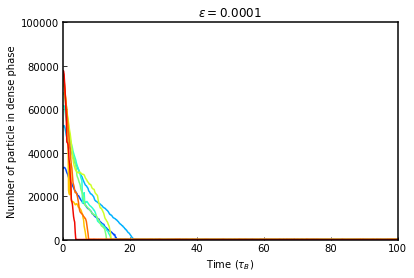

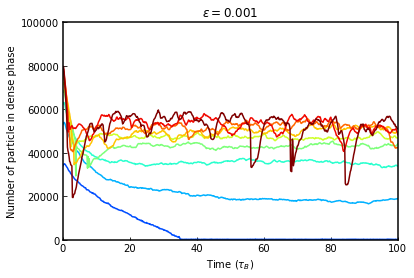

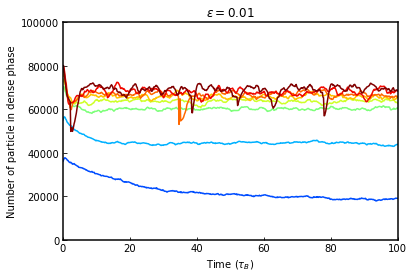

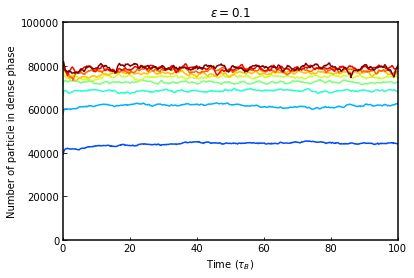

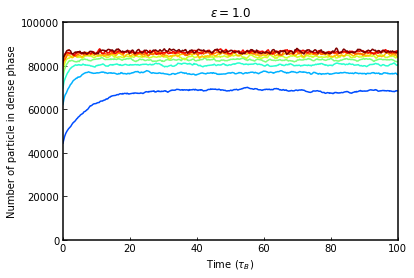

In [12]:
# Plot of pressure of small clusters at constant epsilon (colored by activity)
for i in range(0, len(distSmEps)):
    for j in range(0, len(all_sm_pres)):
        if sm_params['eps'][j] == distSmEps[i]:
            plt.plot(all_sm_pres[j]['Timestep'][:], all_sm_pres[j]['NDense'][:],
                     c=plt.cm.jet(sm_params['peA'][j]/500.), lw=1.5)
    plt.xlabel(r'Time $(\tau_{B})$')
    plt.ylabel(r'Number of particle in dense phase')
    plt.title(r'$\epsilon=$' + str(distSmEps[i]))
    plt.xlim(0,100)
    plt.ylim(0,100000)
    plt.show()


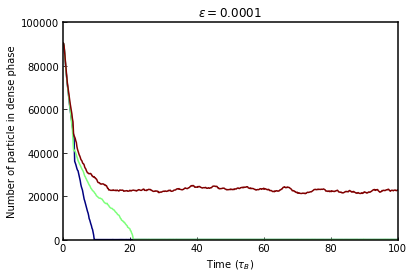

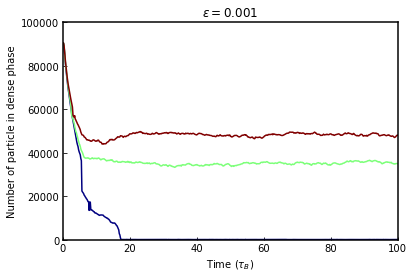

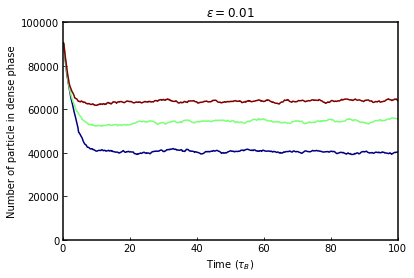

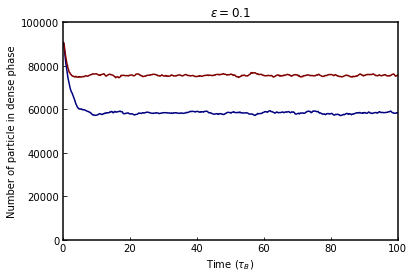

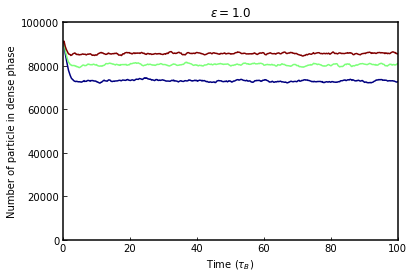

In [13]:
# Plot of pressure of large clusters at constant epsilon (colored by phi)
for i in range(0, len(distLgEps)):
    for j in range(0, len(all_lg_pres)):
        if lg_params['eps'][j] == distLgEps[i]:
            plt.plot(all_lg_pres[j]['Timestep'][:], all_lg_pres[j]['NDense'][:],
                     c=plt.cm.jet((lg_params['phi'][j]-45)/20.), lw=1.5)
    plt.xlabel(r'Time $(\tau_{B})$')
    plt.ylabel(r'Number of particle in dense phase')
    plt.title(r'$\epsilon=$' + str(distLgEps[i]))
    plt.xlim(0,100)
    plt.ylim(0,100000)
    plt.show()

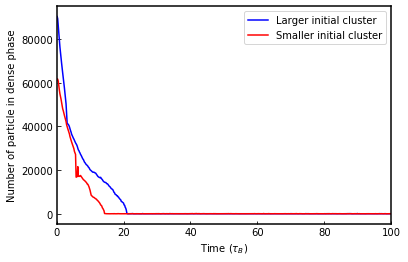

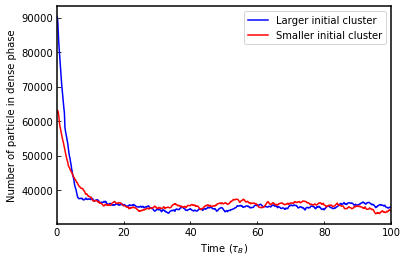

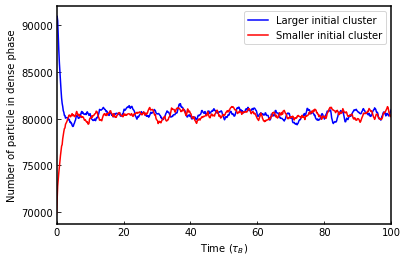

In [14]:
# Let's compare data with the same system parameters
for i in range(0, len(all_lg_pres)):
    # Find the matching smaller cluster system
    for j in range(0, len(all_sm_pres)):
        if lg_params['peA'][i] == sm_params['peA'][j]:
            if lg_params['phi'][i] == sm_params['phi'][j]:
                if lg_params['eps'][i] == sm_params['eps'][j]:
                    plt.plot(all_lg_pres[i]['Timestep'][:], all_lg_pres[i]['NDense'][:], 
                             c='b', lw=1.5, label='Larger initial cluster')
                    plt.plot(all_sm_pres[j]['Timestep'][:], all_sm_pres[j]['NDense'][:],
                             c='r', lw=1.5, label='Smaller initial cluster')
                    plt.xlabel(r'Time $(\tau_{B})$')
                    plt.ylabel(r'Number of particle in dense phase')
                    plt.xlim(0,100)
#                     plt.ylim(0,100000)
                    plt.legend()
                    plt.show()
                    break
                    

In [16]:
# Let's plot number of particles at different epsilon (constant activity) and different activity (constant epsilon)
distEps = []
distAct = []
distPhi = []
# Add small system activities to overal list
for i in range(0, len(distSmEps)):
    if distSmEps[i] not in distEps:
        distEps.append(distSmEps[i])
for i in distSmAct:
    if i not in distAct:
        distAct.append(i)
for i in distSmPhi:
    if i not in distPhi:
        distPhi.append(i)
        
# Add large system activities to overal list
for i in range(0, len(distLgEps)):
    if distLgEps[i] not in distEps:
        distEps.append(distLgEps[i])
for i in distLgAct:
    if i not in distAct:
        distAct.append(i)
for i in distLgPhi:
    if i not in distPhi:
        distPhi.append(i)
        
print(distEps)
print(distAct)
print(distPhi)

[0.0001, 0.001, 0.01, 0.1, 1.0]
[100, 150, 200, 250, 300, 350, 400, 450, 500]
[55.0, 45.0, 65.0]


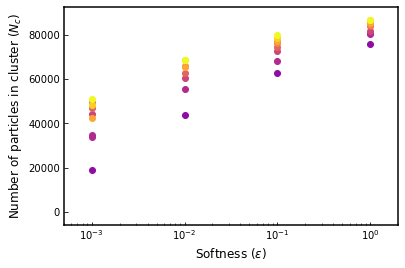

In [30]:
# Let's plot number of particles at different epsilon (constant activity) and different activity (constant epsilon)
constPe = 200
constPhi = 55
for i in range(0, len(all_lg_pres)):
#     if lg_params['peA'][i] == constPe and lg_params['phi'][i] == constPhi:
#     if lg_params['phi'][i] == constPhi:
    if lg_params['phi'][i] == constPhi and lg_params['peA'][i] > 100.:
        plt.scatter(lg_params['eps'][i], all_lg_pres[i]['NDense'].iloc[-1],
                    c=plt.cm.plasma(lg_params['peA'][i]/500.))
        
for i in range(0, len(all_sm_pres)):
#     if sm_params['peA'][i] == constPe and sm_params['phi'][i] == constPhi:
#     if sm_params['phi'][i] == constPhi:
    if sm_params['phi'][i] == constPhi and sm_params['peA'][i] > 100.:
        plt.scatter(sm_params['eps'][i], all_sm_pres[i]['NDense'].iloc[-1],
                    c=plt.cm.plasma(sm_params['peA'][i]/500.))

# Set axes for radius plot
fsize = 12
plt.ylabel(r'Number of particles in cluster $(N_{c})$',
                 fontsize=fsize)
plt.xlabel(r'Softness $(\epsilon)$', fontsize=fsize)
plt.xlim(10**-3/2,2)
# plt.ylim(40, 130)
plt.xscale('log')
plt.show()
        
# for i in range(0, len(all_sm_pres)):